# Airbnb Hotel Booking Analysis

## Questions
This project is aimed to uncover some insights from the Airbnb Open Data. The following questions would be answered from the data

1. What are the different property types in the Dataset?
2. Which neighborhood group has the highest number of listings?
3. Which neighborhoods group have the highest average prices for Airbnb listings?
4. Is there a relationship between the construction year of property and price?
5. Who are the top 10 hosts by calculated host listing count?
6. Are hosts with verified identities more likely to receive positive reviews?
7. Is there a correlation between the price of a listing and its service fee?
8. What is the average review rate number (e.g., stars) for listings, and does it vary based on the neighborhood group and room type?
9. Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?

## 1. Data Wrangling

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [53]:
# Read the Data
df = pd.read_excel("/content/1730285881-Airbnb_Open_Data.xlsx")
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


## Access the data

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [55]:
df.describe()

,id,host id,lat,long,instant_bookable,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102494.000000,102385.000000,102352.000000,102326.000000,102190.000000,102416.000000,86706,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,0.497785,2012.487464,625.293536,125.026924,8.135845,27.483743,2019-06-12 03:40:52.065601024,1.374022,3.279106,7.936605,141.133254
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,0.000000,2003.000000,50.000000,10.000000,-1223.000000,0.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,0.000000,2007.000000,340.000000,68.000000,2.000000,1.000000,2018-10-28 00:00:00,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,0.000000,2012.000000,624.000000,125.000000,3.000000,7.000000,2019-06-14 00:00:00,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,1.000000,2017.000000,913.000000,183.000000,5.000000,30.000000,2019-07-05 00:00:00,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,1.000000,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,332.000000,3677.000000
std,1.625751e+07,2.853900e+10,0.055857,0.049521,0.499998,5.765556,331.671614,66.325739,30.553781,49.508954,NaN,1.746621,1.284657,32.218780,135.435024


In [56]:
df.isna().sum()

,0
id,0
NAME,270
host id,0
host_identity_verified,289
host name,408
neighbourhood group,29
neighbourhood,16
lat,8
long,8
country,532


In [57]:
df.duplicated().value_counts()

,count
False,102058
True,541


## Clean the data



*  Drop duplicated records.

* Drop house_rules and license columns with insufficient data.

* Remove all dollar signs in the price and service fee columns.

* Remove all commas from the price and service fee columns.

* Rename the price and service fee columns to include a dollar signs.

* Drop all records with missing values.

* Change all mismatched data types to the appropriate ones.

* Correct the Spelling of 'brookln' to 'Brooklyn'

* Get rid of outliers in the 'availability 365' column data.

In [58]:
df = df.drop_duplicates(keep = 'first')

In [59]:
df.duplicated().value_counts()

,count
False,102058


In [60]:
df = df.drop(["license","house_rules"],axis = 1)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102058 entries, 0 to 102057
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102058 non-null  int64         
 1   NAME                            101788 non-null  object        
 2   host id                         102058 non-null  int64         
 3   host_identity_verified          101769 non-null  object        
 4   host name                       101652 non-null  object        
 5   neighbourhood group             102029 non-null  object        
 6   neighbourhood                   102042 non-null  object        
 7   lat                             102050 non-null  float64       
 8   long                            102050 non-null  float64       
 9   country                         101526 non-null  object        
 10  country code                    101927 non-null  object      

In [62]:
df['price'].head() # Data doesn't have $ in it and its float64 datatype instead of string

,price
0,966.0
1,142.0
2,620.0
3,368.0
4,204.0


In [63]:
df['service fee'].head() # Data doesn't have $ in it and its float64 datatype instead of string

,service fee
0,193.0
1,28.0
2,124.0
3,74.0
4,41.0


In [64]:
# Rename the price and service fee column
df = df.rename({
    'price':'price_$',
    'service fee':'service_fee_$'
},axis = 1)

In [65]:
# Drop null values containing rows
df = df.dropna()

In [66]:
df.isna().sum()

,0
id,0
NAME,0
host id,0
host_identity_verified,0
host name,0
neighbourhood group,0
neighbourhood,0
lat,0
long,0
country,0


In [68]:
#Change all mismatched data types to the appropriate ones.
df['price_$'] = df['price_$'].astype(float)
df['service_fee_$'] = df['service_fee_$'].astype(float)
df['id'] = df['id'].astype(str)
df['host id'] = df['host id'].astype(str)
df['last review'] = pd.to_datetime(df['last review'])
df['Construction year'] = df['Construction year'].astype(int)

In [69]:
# Correct the name of Brooklyn
df['neighbourhood group'] = df['neighbourhood group'].replace('brookln','Brooklyn')

In [70]:
# Remove outlier in availability 365
df = df.drop(df[df['availability 365'] > 500].index)

## EDA

In [71]:
df.describe()

,lat,long,instant_bookable,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389,83389.000000,83389.000000,83389.000000,83389.000000
mean,40.727349,-73.948502,0.497704,2012.487810,626.209668,125.243114,7.406109,32.261305,2019-06-08 21:32:53.396971008,1.377352,3.278694,7.032894,141.746369
min,40.504560,-74.249840,0.000000,2003.000000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687640,-73.982110,0.000000,2007.000000,340.000000,68.000000,2.000000,3.000000,2018-10-25 00:00:00,0.220000,2.000000,1.000000,6.000000
50%,40.721320,-73.953710,0.000000,2012.000000,625.000000,125.000000,3.000000,11.000000,2019-06-13 00:00:00,0.740000,3.000000,1.000000,101.000000
75%,40.762600,-73.930800,1.000000,2017.000000,914.000000,183.000000,5.000000,38.000000,2019-07-05 00:00:00,2.010000,4.000000,2.000000,266.000000
max,40.916970,-73.705220,1.000000,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,426.000000
std,0.056326,0.050342,0.499998,5.760526,331.803443,66.364212,28.105563,51.954290,NaN,1.751091,1.283678,29.555458,133.377544


### Property type


In [75]:
property_type = df['room type'].value_counts().to_frame()
property_type

,count
room type,
Entire home/apt,44161
Private room,37474
Shared room,1646
Hotel room,108


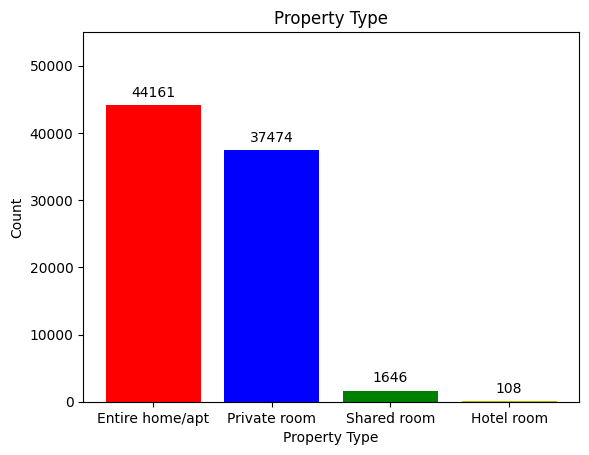

In [88]:
# Plot property type in bar chart
bar = plt.bar(property_type.index,property_type.loc[:,'count'],color = ['r','b','g','y'])
plt.bar_label(bar, labels = property_type.loc[:,'count'], padding = 4)
plt.ylim([0,55000])
plt.title('Property Type')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.show()

### Conclusion:
Entire home/apt is the common property type followed by private room, shared room and hotel room being at last.

### Highest neighbourhood listing

In [91]:
highest = df['neighbourhood group'].value_counts().to_frame()
highest

,count
neighbourhood group,
Brooklyn,34622
Manhattan,34560
Queens,11124
Bronx,2267
Staten Island,816


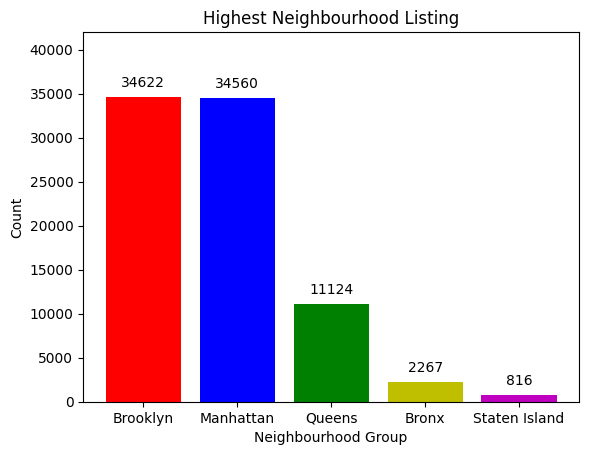

In [96]:
highest_bar = plt.bar(highest.index,highest.loc[:,'count'],color = ['r','b','g','y','m'])
plt.bar_label(highest_bar, highest.loc[:,'count'], padding = 5)
plt.ylim([0,42000])
plt.title('Highest Neighbourhood Listing')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.show()

### Conclusion:
The neighbourhood with highest count of listing is Brooklyn.


### Neighborhoods group have the highest average prices for Airbnb listings

In [108]:
df_neighbourhood = df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending = False).to_frame()
df_neighbourhood

,price_$
neighbourhood group,
Queens,630.502517
Bronx,630.201147
Brooklyn,627.434261
Manhattan,623.435561
Staten Island,622.132353


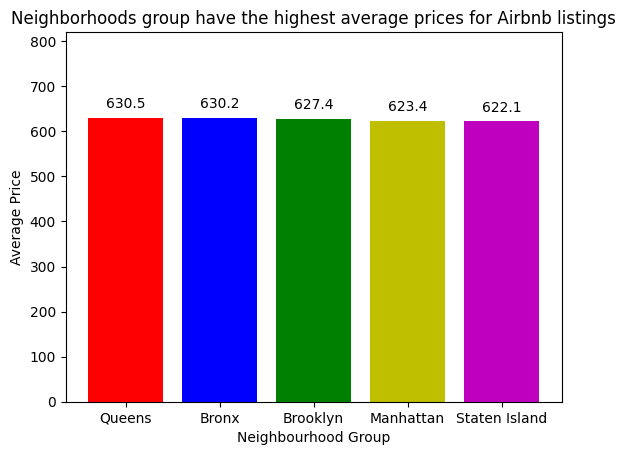

In [109]:
bar_n = plt.bar(df_neighbourhood.index,df_neighbourhood.loc[:,'price_$'],color = ['r','b','g','y','m'],)
plt.bar_label(bar_n, df_neighbourhood.loc[:,'price_$'].map(lambda x: f'{x:.1f}'), padding = 5)
plt.ylim([0,820])
plt.title('Neighborhoods group have the highest average prices for Airbnb listings')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')
plt.show()

### Conclusion:
Queens has the highest average prices for Airbnb listings.

### Relationship between the construction year of property and price

Text(0.5, 1.0, 'Relationship between the construction year of property and price')

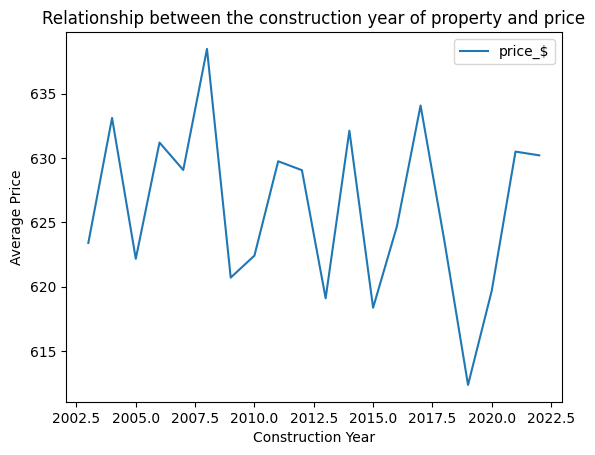

In [127]:
df.groupby(df['Construction year'])['price_$'].mean().to_frame().plot();
plt.xlabel('Construction Year')
plt.ylabel('Average Price')
plt.title('Relationship between the construction year of property and price')

### Conclusion:

The line plot depicting the construction year of properties versus the average price per property reveals a noticeable downward trend in prices as the construction years progress. The pattern demonstrates decreasing lows and highs, suggesting an overall decline in property prices as time progresses.

### Top 10 hosts by calculated host listing count

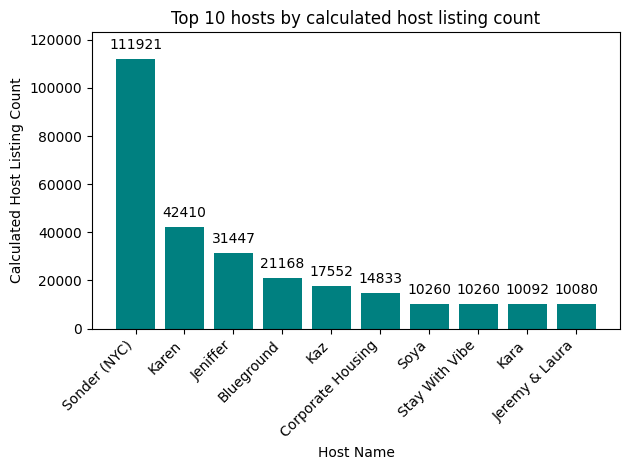

In [136]:
hosts = df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending=False).to_frame().head(10)
host_names = hosts.index
listing_counts = hosts['calculated host listings count']

labels = [f'{x:.0f}' for x in listing_counts]

bar_hosts = plt.bar(
    host_names,
    listing_counts,
    color='teal'
)
plt.bar_label(bar_hosts, labels, padding=5)
plt.ylim([0, listing_counts.max() * 1.1])
plt.title('Top 10 hosts by calculated host listing count')
plt.xlabel('Host Name')
plt.ylabel('Calculated Host Listing Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Conclusion:
Highest number of listings is by Sonder(NYC) followed by Karen and Jennifer.

### Are hosts with verified identities more likely to receive positive reviews?

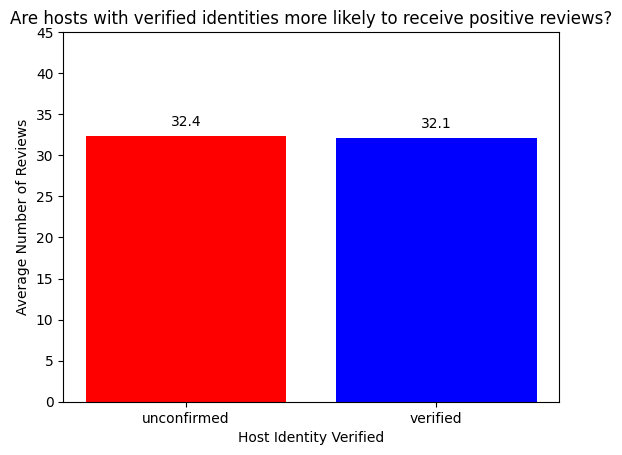

In [142]:
host_id_verfied = df.groupby(['host_identity_verified'])['number of reviews'].mean().to_frame()
bar_id = plt.bar(host_id_verfied.index,host_id_verfied.loc[:,'number of reviews'],color = ['r','b'])
plt.bar_label(bar_id, host_id_verfied.loc[:,'number of reviews'].map(lambda x: f'{x:.1f}'), padding = 5)
plt.ylim([0,45])
plt.xlabel('Host Identity Verified')
plt.ylabel('Average Number of Reviews')
plt.title('Are hosts with verified identities more likely to receive positive reviews?')
plt.show()

### Conclusion:
Hosts with verified identities more likely to receive positive reviews is not true as we saw in the graph. Average rating is almost same for both verified and unconfirmed hosts.

##  Correlation between the price of a listing and its service fee

In [143]:
df['price_$'].corr(df['service_fee_$'])

np.float64(0.9999909082976466)

Text(0, 0.5, 'Service Fee')

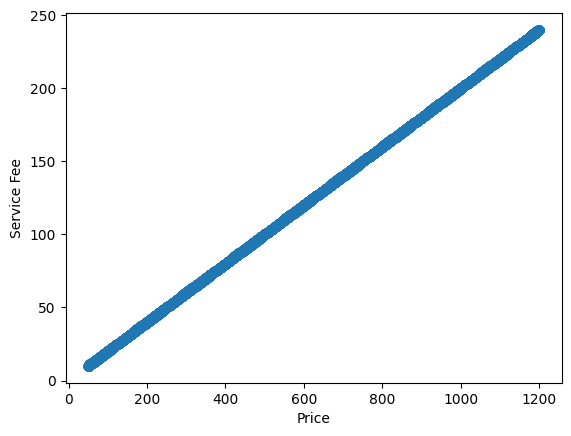

In [144]:
sns.regplot(x = df['price_$'],y = df['service_fee_$'])
plt.xlabel('Price')
plt.ylabel('Service Fee')

### Conclusion:
There is strong positive relationship between price and service fee. If price is high then service fee will also be high.

### What is the average review rate number (e.g., stars) for listings, and does it vary based on the neighborhood group and room type?

In [149]:
avg_rate = df.groupby(['neighbourhood group','room type'])['review rate number'].mean().to_frame()
avg_rate

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.381881
                    Private room               3.305810
                    Shared room                3.356322
Brooklyn            Entire home/apt            3.242491
                    Hotel room                 3.833333
                    Private room               3.274773
                    Shared room                3.323383
Manhattan           Entire home/apt            3.268846
                    Hotel room                 3.500000
                    Private room               3.285431
                    Shared room                3.261976
Queens              Entire home/apt            3.349528
                    Hotel room                 3.750000
                    Private room               3.310847
                    Shared room                3.327402
Staten Island       Entire home/apt            3.333333
                    Private room               3.497449
                    Shared room                3.714286

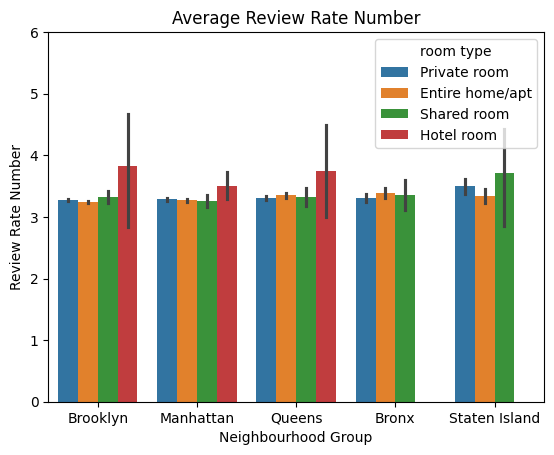

In [153]:
sns.barplot(data = df, x = 'neighbourhood group',y = 'review rate number' , hue = 'room type')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Review Rate Number')
plt.title('Average Review Rate Number')
plt.ylim([0,6])
plt.show()

### Conclusion:
The average is highest for hotel room of Brooklyn and least for Entire home/apt for Brooklyn.

### Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?

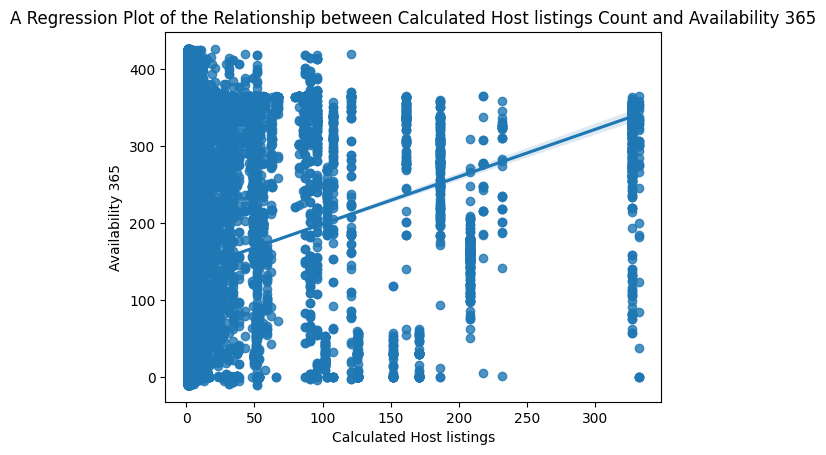

In [154]:
sns.regplot(df, x = 'calculated host listings count', y = 'availability 365');
plt.xlabel('Calculated Host listings');
plt.ylabel('Availability 365');
plt.title('A Regression Plot of the Relationship between Calculated Host listings Count and Availability 365');

In [156]:
print(df['calculated host listings count'].corr(df['availability 365']))

0.1359971471570339


### Conclusion:
Weak positive correlation between Calculated host listings count and availability 365.

## Final Conclusion:

In conclusion, this project has provided a comprehensive analysis of the New York City Airbnb dataset, shedding light on various aspects of the short-term lodging market. Through data wrangling, exploratory data analysis (EDA), and interpretation of summary statistics, we've uncovered valuable insights into listing distribution, pricing dynamics, host, and review analysis.

Key findings include the dominance in counts of Entire home/apt listings, the variability in listing counts across neighborhood groups, and the downward trend between property construction year and price. Additionally, the analysis highlighted the significance of verified host status on review rates, as well as the strong correlation between listing price and service fee.

Furthermore, conducting sentiment analysis on guest reviews to understand factors driving customer satisfaction and preferences could inform targeted marketing strategies and product improvements for Airbnb. Lastly, expanding the analysis to include predictive modeling techniques, such as regression or machine learning algorithms, could enable forecasting of listing demand, pricing trends, and customer behavior, facilitating strategic decision-making for stakeholders in the short-term lodging industry.